## Stochastic Processes Comparison of Accuracy: Data Assimilation, Echo State Machines and Nonlinear Vector Autoregressive Learning Methods.
### Comparing discrete and variational data assimilation methods to reservoir computing - machine learning for synthetic chaotic nonlinear dynamical systems

1. __The Attractors Used__
<br/>
    - Lorenz 1963 Model for Atmospheric Convection (Rayleigh Benard Convection)
<br/>
2. __Reservoir Computing Methods__ 
<br/>
    * Echo State Machine - Hierarchial Structure
    * Echo State Machine - Deep ESN with nonlinear activation function, externally applied
<br/>
3. __Other Neural Network Models__
<br/>
    * Nonlinear Vector AutoRegression (NVAR)
<br/>
4. __Data Assimilation Methods__ 
<br/>
    * Kalman Filter (Discrete - Ensemble)
    * 3D Variational Data Assimilation
    * Particle Filter
<br/>





Installation of packages used in this experiment

In [275]:
%%capture
!pip install ipympl
!pip install statsmodels
!pip install reservoirpy
!pip install seaborn
!pip install numpy 
!pip install matplotlib
!pip install sklearn 

import reservoirpy
import seaborn as seaborn
from math import sin, cos
import numpy as numpy
import matplotlib.pyplot
import random
import collections
from sklearn.metrics import mean_squared_error
#%matplotlib qt
%matplotlib inline


## Runge-Kutta Algorithm for three dimensional chaotic dynamical systems


In [256]:
# inital states for the loops, so each lorenz attarctor will be passed through this for processing in the solve_system method
initialXvalue, initialYvalue, initialZvalue = -0.1, 0.5, -0.6
states = None
dt = 0.01
# Initiate states for the approximation
alpha, beta, gamma = 10, 28, 8/3

In [257]:
def xt(x, y, z, t):
    return (alpha * (y - x))


def yt(x, y, z, t):
    return (beta*x - x*z - y)


def zt(x, y, z, t):
    return (x*y - gamma * z)


In [258]:
def approximate(xt, yt, zt, n, x, y, z, t, dt):
    for k in range(n):
        t[k + 1] = t[k] + dt

        roundOne_k = xt(x[k], y[k], z[k], t[k])
        roundOne_l = yt(x[k], y[k], z[k], t[k])
        roundOne_m = zt(x[k], y[k], z[k], t[k])

        roundTwo_k = xt(
            (x[k] + 0.5*roundOne_k*dt),
            (y[k] + 0.5*roundOne_l*dt),
            (z[k] + 0.5*roundOne_m*dt),
            (t[k] + dt/2))
        roundTwo_l = yt(
            (x[k] + 0.5*roundOne_k*dt),
            (y[k] + 0.5*roundOne_l*dt),
            (z[k] + 0.5*roundOne_m*dt),
            (t[k] + dt/2))
        roundTwo_m = zt(
            (x[k] + 0.5*roundOne_k*dt),
            (y[k] + 0.5*roundOne_l*dt),
            (z[k] + 0.5*roundOne_m*dt),
            (t[k] + dt/2))

        roundThree_k = xt(
            (x[k] + 0.5*roundTwo_k*dt),
            (y[k] + 0.5*roundTwo_l*dt),
            (z[k] + 0.5*roundTwo_m*dt),
            (t[k] + dt/2))
        roundThree_l = yt(
            (x[k] + 0.5*roundTwo_k*dt),
            (y[k] + 0.5*roundTwo_l*dt),
            (z[k] + 0.5*roundTwo_m*dt),
            (t[k] + dt/2))
        roundThree_m = zt(
            (x[k] + 0.5*roundTwo_k*dt),
            (y[k] + 0.5*roundTwo_l*dt),
            (z[k] + 0.5*roundTwo_m*dt),
            (t[k] + dt/2))

        roundFour_k = xt(
            (x[k] + roundThree_k*dt),
            (y[k] + roundThree_l*dt),
            (z[k] + roundThree_m*dt),
            (t[k] + dt))
        roundFour_l = yt(
            (x[k] + roundThree_k*dt),
            (y[k] + roundThree_l*dt),
            (z[k] + roundThree_m*dt),
            (t[k] + dt))
        roundFour_m = zt(
            (x[k] + roundThree_k*dt),
            (y[k] + roundThree_l*dt),
            (z[k] + roundThree_m*dt),
            (t[k] + dt))

        x[k+1] = x[k] + (dt*(roundOne_k + 2*roundTwo_k +
                         2*roundThree_k + roundFour_k) / 6)
        y[k+1] = y[k] + (dt*(roundOne_l + 2*roundTwo_l +
                         2*roundThree_l + roundFour_l) / 6)
        z[k+1] = z[k] + (dt*(roundOne_m + 2*roundTwo_m +
                         2*roundThree_m + roundFour_m) / 6)


In [259]:
def Runge_Kutta_Approximation(xt, yt, zt, n=100000, T=10000):
    x = numpy.zeros(n + 1)  # x[k] is the solution at time t[k]
    y = numpy.zeros(n + 1)  # y[k] is the solution at time t[k]
    z = numpy.zeros(n + 1)  # z[k] is the solution at time t[k]
    t = numpy.zeros(n + 1)
    x[0] = initialXvalue
    y[0] = initialYvalue
    z[0] = initialZvalue
    t[0] = 0
    dt = 0.001
    # Compute the approximate solution at equally spaced times.
    approximate(xt, yt, zt, n, x, y, z, t, dt)

    return x, y, z, t


In [260]:
def initialDerivative(xt, yt, zt, x, y, z, t):
    f0_dx = xt(x[0], y[0], z[0], t[0])
    f0_dy = yt(x[0], y[0], z[0], t[0])
    f0_dz = zt(x[0], y[0], z[0], t[0])

    f1_dx = xt(x[1], y[1], z[1], t[1])
    f1_dy = yt(x[1], y[1], z[1], t[1])
    f1_dz = zt(x[1], y[1], z[1], t[1])

    f2_dx = xt(x[2], y[2], z[2], t[2])
    f2_dy = yt(x[2], y[2], z[2], t[2])
    f2_dz = zt(x[2], y[2], z[2], t[2])

    f3_dx = xt(x[3], y[3], z[3], t[3])
    f3_dy = yt(x[3], y[3], z[3], t[3])
    f3_dz = zt(x[3], y[3], z[3], t[3])
    return f0_dx, f0_dy, f0_dz, f1_dx, f1_dy, f1_dz, f2_dx, f2_dy, f2_dz, f3_dx, f3_dy, f3_dz


In [261]:
def prediction_round(RungeKutta, xt, yt, zt, initalDerivative, n=100000):
    # adams-bashford method AB4 used for standard paramters for the lorenz system as defined above.
    x, y, z, t = RungeKutta
    f0_dx, f0_dy, f0_dz, f1_dx, f1_dy, f1_dz, f2_dx, f2_dy, f2_dz, f3_dx, f3_dy, f3_dz = initalDerivative
    for k in range(n-1, 0, -1):
        x[k + 1] = x[k] + (dt / 24) * (55*f3_dx - 59 *
                                       f2_dx + 37*f1_dx - 9*f0_dx)
        y[k + 1] = y[k] + (dt / 24) * (55 * f3_dy - 59 *
                                       f2_dy + 37 * f1_dy - 9 * f0_dy)
        z[k + 1] = z[k] + (dt / 24) * (55 * f3_dz - 59 *
                                       f2_dz + 37 * f1_dz - 9 * f0_dz)

        x[k + 1] = x[k] + (dt / 24) * (9 * xt(x[k+1], y[k+1],
                                              z[k+1], t[k+1]) + 19 * f3_dx - 5 * f2_dx + f1_dx)
        y[k + 1] = y[k] + (dt / 24) * (9 * yt(x[k+1], y[k+1],
                                              z[k+1], t[k+1]) + 19 * f3_dy - 5 * f2_dx + f1_dy)
        z[k + 1] = z[k] + (dt / 24) * (9 * zt(x[k+1], y[k+1],
                                              z[k+1], t[k+1]) + 19 * f3_dz - 5 * f2_dx + f1_dz)
        return x, y, z, t


In [262]:
import numpy as numpy
def PredictorCorrector(xt, yt, zt, n=100000, T=35):
    x = numpy.zeros(n + 2)  # x[k] is the solution at time t[k]
    y = numpy.zeros(n + 2)  # y[k] is the solution at time t[k]
    z = numpy.zeros(n + 2)  # z[k] is the solution at time t[k]
    t = numpy.zeros(n + 2)
    x[0] = initialXvalue
    y[0] = initialYvalue
    z[0] = initialZvalue
    t[0] = 0

    x, y, z, t = prediction_round(Runge_Kutta_Approximation(xt, yt, zt),
                                  xt, yt, zt,
                                  initialDerivative(xt, yt, zt, x, y, z, t))

    return x, y, z, t


In [263]:
import seaborn as seaborn
dataPoints = PredictorCorrector(xt, yt, zt)


## Reservoir Computing Echo State Network: Ridge Regression


In [264]:

reservoirpy.set_seed(42)  # make everyhting reproducible !


In [265]:
x, y, z, = dataPoints[0], dataPoints[1], dataPoints[2]

In [266]:
import random
import string


def get_string():
    # get random string of letters and digits
    source = string.ascii_letters + string.digits
    result_str = ''.join((random.choice(source) for i in range(8)))

    return result_str
    # invoking the function


 Plotting for the outputs


In [360]:
def plotTimeSeries(PREDICTED, FORECAST=0, dataPointsTS=[0]):
    matplotlib.pyplot.figure(figsize=(15, 5))
    matplotlib.pyplot.plot(PREDICTED, label='predicted',
                           color='blue', alpha=0.75)
    #matplotlib.pyplot.ylim([-0.25, 0.25])
    #matplotlib.pyplot.xlim([10, 100100])
    # matplotlib.pyplot.autoscale()
    matplotlib.pyplot.plot(FORECAST, label='Forecast', color='green')
    matplotlib.pyplot.plot(
        dataPointsTS, label='Ground Truth', color='orange', alpha=0.5)
    matplotlib.pyplot.legend()
    matplotlib.pyplot.show()


def plot3dTimeSeries(PREDICTEDx, PREDICTEDy, PREDICTEDz):
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt
    fig1 = plt.figure(figsize=(10, 10))
    #    fig2 = plt.figure(figsize = (30, 30))
    ax = plt.axes(projection='3d')
    ax = plt.axes(projection='3d')
    #ax.set_xlim3d([-25, 30])
    #ax.set_ylim3d([-4, 3])
    plt.autoscale()
    # Data for a three-dimensional line
    zline = numpy.concatenate(PREDICTEDx, axis=0)
    xline = numpy.concatenate(PREDICTEDy, axis=0)
    yline = numpy.concatenate(PREDICTEDz, axis=0)
    ax.plot3D(xline, yline, zline)


### Hierarchial ESN Structure

In [368]:

def RidgeRegressionESN(x):
    result = get_string()
    reservoir = reservoirpy.nodes.Reservoir(
        1000, lr=0.5, sr=1.8, name='res1-1{}'.format(result))
    reservoir_companion = reservoirpy.nodes.Reservoir(
        1000, lr=0.5, sr=1.8, name='res2-1{}'.format(result))
    RidgeReg = reservoirpy.nodes.Ridge(
        ridge=2e-7, name='readout2-2{}'.format(result))
    Readout = reservoirpy.nodes.Ridge(
        ridge=2e-7, name='readout1-1{}'.format(result))
    X_TRAIN = x[:70000].reshape(-1, 1)
    Y_TRAIN = x[1:70001].reshape(-1, 1)
    ''' TRAIN_STATES = reservoir.run(X_TRAIN, reset = True)
    TEST_STATES = reservoir.run(x[:100000].reshape(-1, 1))
    Readout = Readout.fit(TRAIN_STATES, Y_TRAIN)
    RidgeReg = RidgeReg.fit(TRAIN_STATES, Y_TRAIN)
    Y_PREDICTED = Readout.run(TEST_STATES)'''
    ESN_MODEL = reservoir >> Readout >> reservoir_companion >> RidgeReg
    ESN_MODEL = ESN_MODEL.fit(X_TRAIN, Y_TRAIN)
    print('Reservoir Initialisation: ', reservoir.is_initialized)
    print('Readout Initialisation: ', Readout.is_initialized)
    print('Readout Fitted: ', Readout.fitted)
    Y_PREDICTED = ESN_MODEL.run(x[: 100000].reshape(-1, 1))
    return Y_PREDICTED


In [369]:

X_PREDICTED_Hierarchial = RidgeRegressionESN(dataPoints[0])
Y_PREDICTED_Hierarchial = RidgeRegressionESN(dataPoints[1])
Z_PREDICTED_Hierarchial = RidgeRegressionESN(dataPoints[2])


Running Model-249: 70000it [00:17, 3918.46it/s]?, ?it/s]
Running Model-249: 100%|██████████| 1/1 [00:19<00:00, 19.72s/it]


Fitting node readout1-1DL66Fq7O...


Running Model-249: 70000it [00:19, 3619.53it/s]?, ?it/s]
Running Model-249: 100%|██████████| 1/1 [00:21<00:00, 21.22s/it]


Fitting node readout2-2DL66Fq7O...
Reservoir Initialisation:  True
Readout Initialisation:  True
Readout Fitted:  True


Running Model-249: 100000it [00:44, 2252.49it/s]        
Running Model-252: 70000it [00:17, 3898.75it/s]?, ?it/s]
Running Model-252: 100%|██████████| 1/1 [00:19<00:00, 19.80s/it]


Fitting node readout1-1smKX1TD4...


Running Model-252: 70000it [35:34, 32.79it/s]0<?, ?it/s]
Running Model-252: 100%|██████████| 1/1 [35:36<00:00, 2136.63s/it]


Fitting node readout2-2smKX1TD4...
Reservoir Initialisation:  True
Readout Initialisation:  True
Readout Fitted:  True


Running Model-252: 100000it [49:46, 33.48it/s]          
Running Model-255: 70000it [00:18, 3751.40it/s]?, ?it/s]
Running Model-255: 100%|██████████| 1/1 [00:21<00:00, 21.25s/it]


Fitting node readout1-1qTmCals4...


Running Model-255: 70000it [00:19, 3590.26it/s]?, ?it/s]
Running Model-255: 100%|██████████| 1/1 [00:21<00:00, 21.45s/it]


Fitting node readout2-2qTmCals4...
Reservoir Initialisation:  True
Readout Initialisation:  True
Readout Fitted:  True


Running Model-255: 100000it [00:43, 2305.28it/s]        


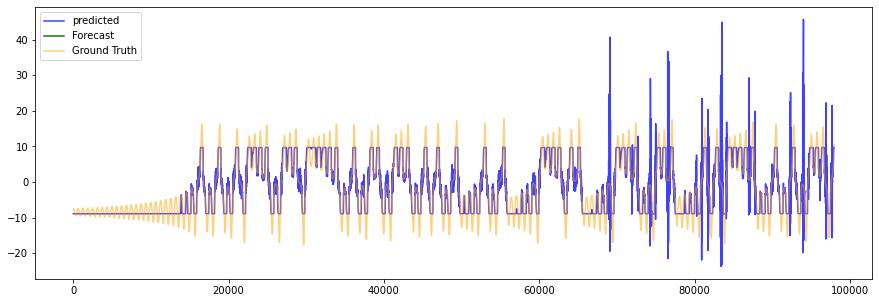

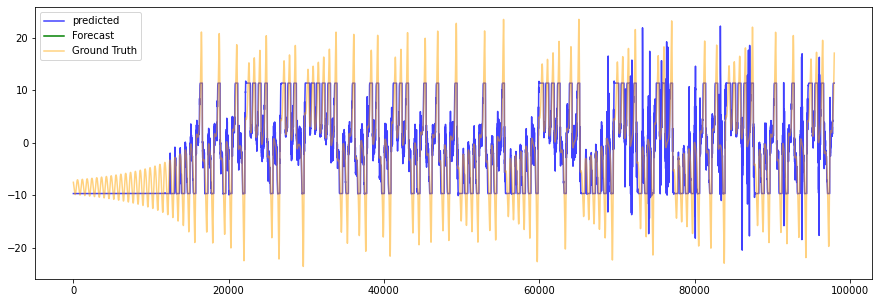

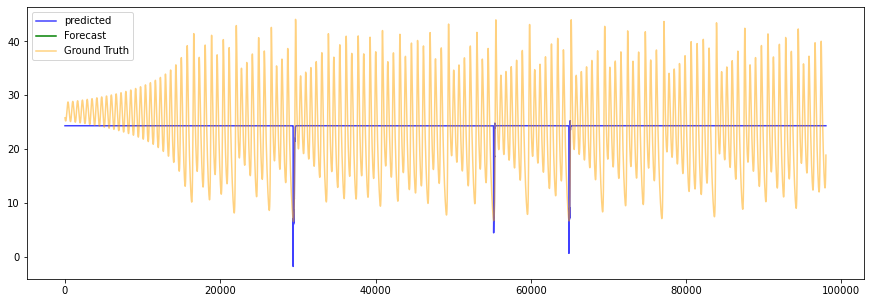

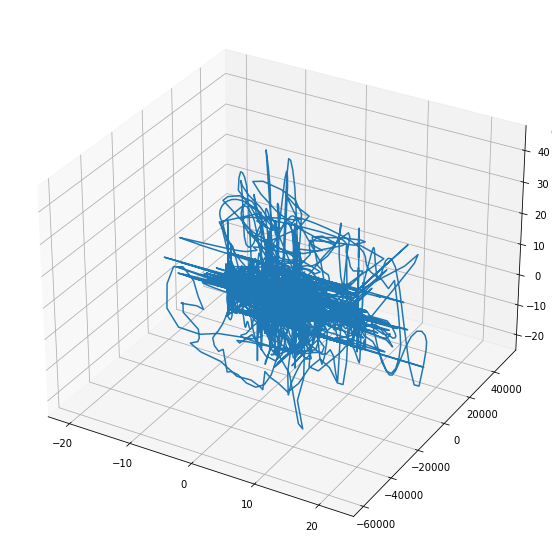

In [367]:
plotTimeSeries(X_PREDICTED_Hierarchial[2000:],0, dataPoints[0][2000:])
plotTimeSeries(Y_PREDICTED_Hierarchial[2000:],0, dataPoints[1][2000:])
plotTimeSeries(Z_PREDICTED_Hierarchial[2000:],0, dataPoints[2][2000:])
plot3dTimeSeries(X_PREDICTED_Hierarchial,
                 Y_PREDICTED_Hierarchial, Z_PREDICTED_Hierarchial)


## Deep Echo State Network Model - Linear Readout (Ridge Regression)

### Three reservoirs, single feedback and single Ridge Regression Readout


![image](https://github.com/reservoirpy/reservoirpy/raw/e4d271a114a785929cdbd4639aaa36e3a731470c/tutorials/static/deep2.svg)


In [ ]:
def deepESN(x, TimeSteps, TrainingProportion = 0.2, warmupPercentage = 0.1):
    
    assert type(TimeSteps) == int, 'Number of Time steps must be integer'
    result = get_string()
    
    reservoir1 = reservoirpy.nodes.Reservoir(
        1000, lr=0.5, sr=1.3,equation = 'external' , name='res1-1{}'.format(result)).reset
    reservoir2 = reservoirpy.nodes.Reservoir(
        1000, lr=0.5, sr=1.3,equation = 'external' ,name='res2-1{}'.format(result)).reset
    reservoir3 = reservoirpy.nodes.Reservoir(
        1000, lr=0.5, sr=1.3,equation = 'external' ,name='res3-1{}'.format(result)).reset

    RidgeReg = reservoirpy.nodes.Ridge(
        ridge=1e-7, name='readout2-2{}'.format(result)).reset

    data = reservoirpy.nodes.Input().reset

    Y_FORECAST = numpy.empty((TimeSteps + 2000, 1))
   
    X_TRAIN = x[:  int( TimeSteps -  TimeSteps * TrainingProportion)].reshape(-1, 1)
    Y_TRAIN = x[1: int((TimeSteps -  TimeSteps * TrainingProportion) + 1)].reshape(-1, 1)

    ESN_MODEL = reservoir1 >> reservoir2 >> reservoir3 & \
        data >> [reservoir1, reservoir2, reservoir3] >> RidgeReg

    ESN_MODEL = ESN_MODEL.fit(X_TRAIN, Y_TRAIN, warmup=1000)

    Y_PREDICTED = ESN_MODEL.run(x[: TimeSteps].reshape(-1, 1))

    warmup_y = ESN_MODEL.run(X_TRAIN[:-int(TimeSteps * warmupPercentage)])
    X_FORECAST = warmup_y[-1].reshape(1, -1)
    for iteration in range(TimeSteps + 2000):
        X_FORECAST = ESN_MODEL(X_FORECAST)
        Y_FORECAST[iteration] = X_FORECAST
    

    return Y_PREDICTED, Y_FORECAST


In [277]:

X_PREDICTED_DEEP, X_FORECAST = deepESN(dataPoints[0], 100000)

Running Model-143: 80000it [01:12, 1103.58it/s]?, ?it/s]
Running Model-143: 100%|██████████| 1/1 [01:24<00:00, 84.80s/it]


Fitting node readout2-2wN8VVM41...


/Users/adamjamessheppard/opt/anaconda3/lib/python3.9/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=6.56137e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")
Running Model-143: 100000it [01:21, 1223.05it/s]        
Running Model-143: 70000it [00:57, 1226.90it/s]         


In [278]:
Y_PREDICTED_DEEP, Y_FORECAST = deepESN(dataPoints[1], 100000)

Running Model-148: 80000it [01:11, 1114.03it/s]?, ?it/s]
Running Model-148: 100%|██████████| 1/1 [01:23<00:00, 83.66s/it]


Fitting node readout2-2Hq2C6UHX...


Running Model-148: 100000it [01:22, 1218.41it/s]        
Running Model-148: 70000it [00:57, 1212.76it/s]         


In [317]:
Z_PREDICTED_DEEP, Z_FORECAST = deepESN(dataPoints[2], 100000)

Running Model-204: 80000it [01:11, 1125.92it/s]?, ?it/s]
Running Model-204: 100%|██████████| 1/1 [01:22<00:00, 82.25s/it]


Fitting node readout2-2kj4Hm5SW...


/Users/adamjamessheppard/opt/anaconda3/lib/python3.9/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=6.15243e-18): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")
Running Model-204: 100000it [01:20, 1243.57it/s]        
Running Model-204: 70000it [00:56, 1239.39it/s]         


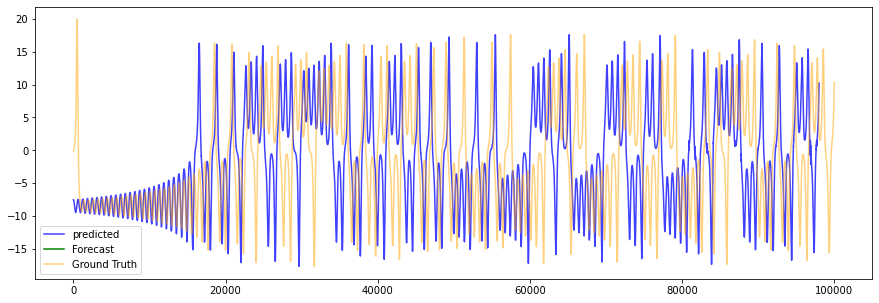

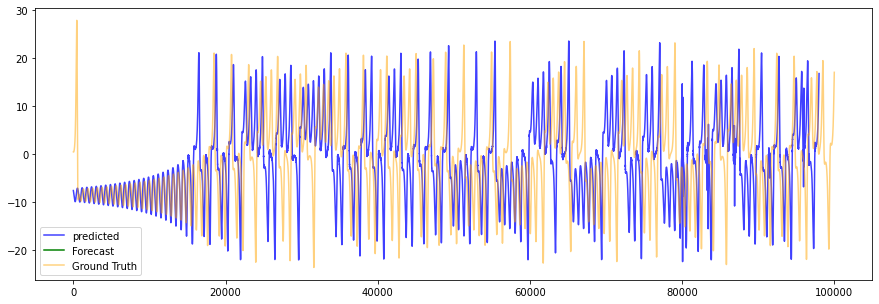

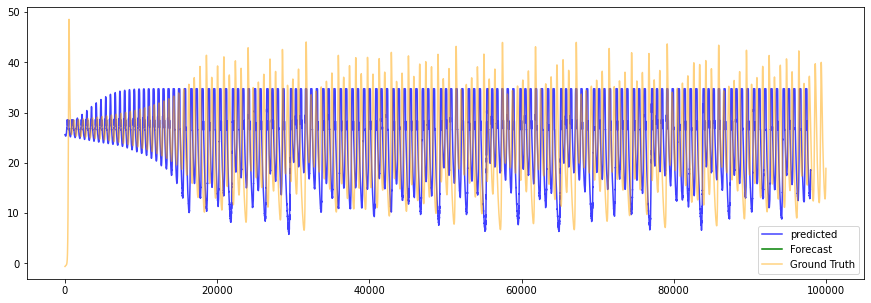

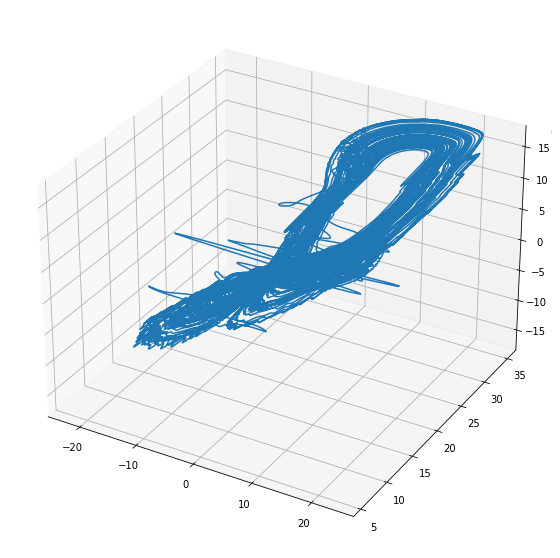

In [349]:

plotTimeSeries((X_PREDICTED_DEEP[2000:]), 0, dataPoints[0])
plotTimeSeries(Y_PREDICTED_DEEP[2000:], 0, dataPoints[1])
plotTimeSeries((Z_PREDICTED_DEEP[2000:]), 0, (dataPoints[2]))
plot3dTimeSeries(X_PREDICTED_DEEP[2000:], Y_PREDICTED_DEEP[2000:], Z_PREDICTED_DEEP[2000:])

In [328]:

X_PRED = numpy.concatenate(X_PREDICTED_DEEP, axis = 0)
Y_PRED = numpy.concatenate(Y_PREDICTED_DEEP, axis = 0)
Z_PRED = numpy.concatenate(Z_PREDICTED_DEEP, axis = 0)
# scrap manual calculation - yields the same results as built in function
'''X_PRED_H = numpy.concatenate(X_PREDICTED_Hierarchial, axis=0)
MSE_H = (numpy.square(- X_PRED_H.reshape(-1, 1) +
         dataPoints[0][:100000].reshape(-1, 1))).mean()'''
# print the mean squared error
print('Mean Squared Error X(t) | ' + str(mean_squared_error(X_PRED, dataPoints[0][: len(X_PRED)])))
print('Mean Squared Error Y(t) | ' + str(mean_squared_error(Y_PRED, dataPoints[1][: len(Y_PRED)])))
print('Mean Squared Error Z(t) | ' + str(mean_squared_error(Z_PRED, dataPoints[2][: len(Z_PRED)])))


Mean Squared Error X(t) | 0.6631098642263717
Mean Squared Error Y(t) | 14.490097125669761
Mean Squared Error Z(t) | 66440740.62919213


## Testing on Mackey-Glass Dataset 

In [282]:
def mackey_glass(n, a=0.2, b=0.1, c=10, d=22):
    x = 1 + numpy.random.rand(n+d)
    for i in range(d-1, n+d-1):
        x[i+1] = x[i] + a*x[i-d] / (1 + x[i-d]**c) - b*x[i]
    return numpy.tanh(x[d:])

In [301]:

mackeyGlass = mackey_glass(100000)
MK_PREDICTED, FORECAST = deepESN(mackeyGlass, 100000)


Running Model-189: 80000it [01:11, 1118.51it/s]?, ?it/s]
Running Model-189: 100%|██████████| 1/1 [01:23<00:00, 83.15s/it]


Fitting node readout2-22LZnJTI9...


/Users/adamjamessheppard/opt/anaconda3/lib/python3.9/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=5.75068e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")
Running Model-189: 100000it [01:20, 1236.01it/s]        
Running Model-189: 70000it [00:56, 1236.30it/s]         


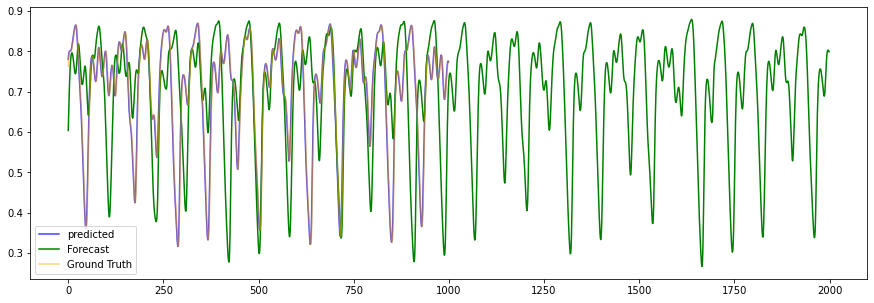

In [325]:
plotTimeSeries(MK_PREDICTED[99000:101000], FORECAST[99000:101000], mackeyGlass[99000:101000] )

In [307]:
print('Mean Squared Error Mackey Glass: ' + str(mean_squared_error(MK_PREDICTED, mackeyGlass)))

Mean Squared Error Mackey Glass: 0.0003547860424231836


## Nonlinear Vector AutoRegressive (NVAR) Model


In [286]:
# put the system discretised by the runge kutta approximation into a vector 
testTime = 2000 # change when needed 

In [287]:

X = [dataPoints[0], dataPoints[1], dataPoints[2]]
X = numpy.array(X).T
NVAR = reservoirpy.nodes.NVAR(delay = 2, order = 2, strides = 1)
Readout = reservoirpy.nodes.Ridge(3, ridge = 2.5e-7)
MODEL = NVAR >> Readout 
Xi  = X[:testTime]
dXi = X[1:testTime + 1] - X[:testTime]  # difference u[t+1] - u[t]
Y_test = X[testTime:]  # testing data
model = MODEL.fit(Xi, dXi)
model.fit(Xi, dXi, warmup=200)
u = X[testTime]
res = numpy.zeros((len(dataPoints[0]) - testTime, Readout.output_dim))
for i in range(len(dataPoints[0]) - testTime):
   u = u + model(u)
   res[i, :] = u
X_PREDICTED_nvar = []
Y_PREDICTED_nvar = []
Z_PREDICTED_nvar = []

for i in range(len(res)):
       X_PREDICTED_nvar.append(res[i][0])
       Y_PREDICTED_nvar.append(res[i][1])
       Z_PREDICTED_nvar.append(res[i][2])


Running Model-159: 2000it [00:00, 14025.73it/s]?, ?it/s]
Running Model-159: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]
/Users/adamjamessheppard/opt/anaconda3/lib/python3.9/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=1.1486e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")


Fitting node Ridge-122...


Running Model-159: 2000it [00:00, 12711.17it/s]?, ?it/s]
Running Model-159: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]
/Users/adamjamessheppard/opt/anaconda3/lib/python3.9/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=9.83699e-18): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")


Fitting node Ridge-122...


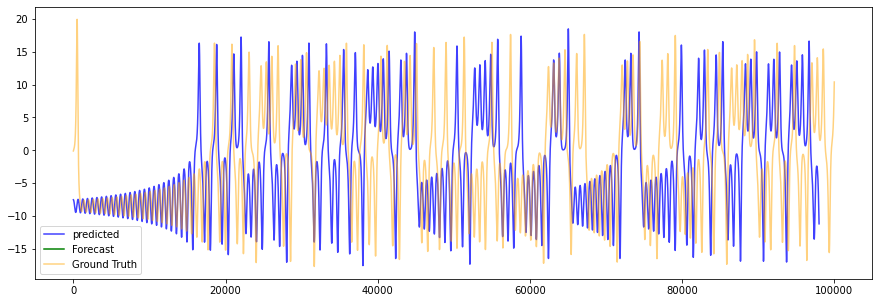

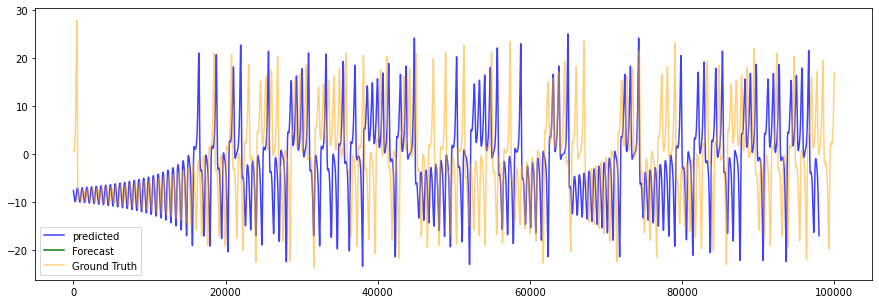

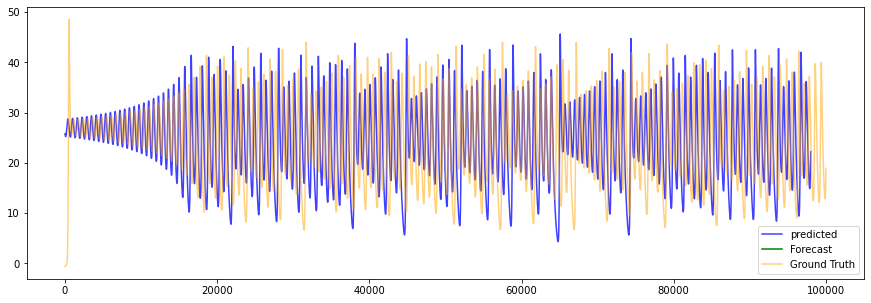

Text(0.5, 0.92, 'Ground State')

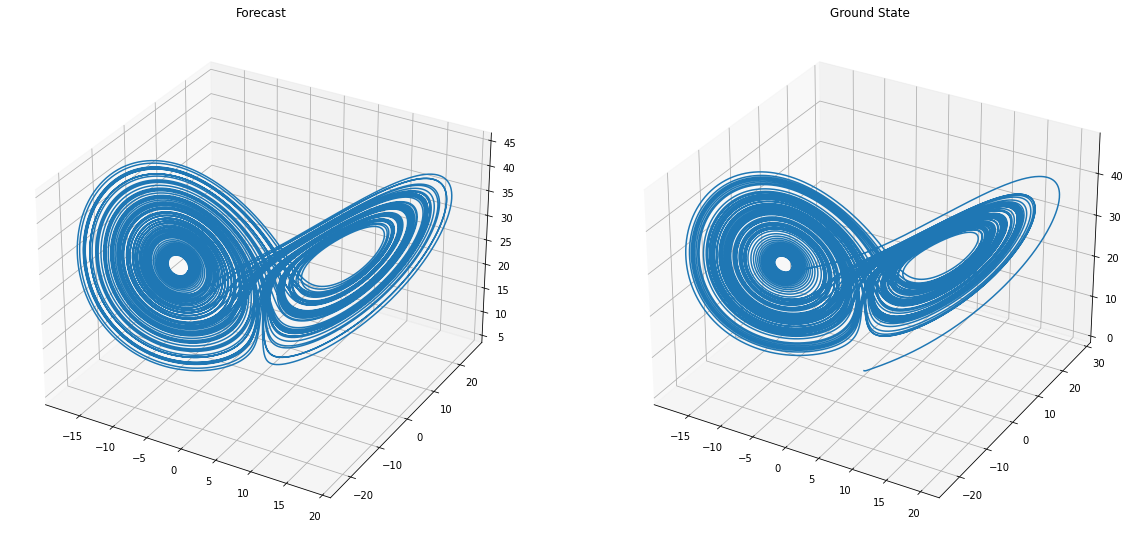

In [371]:
plotTimeSeries(X_PREDICTED_nvar, 0, dataPoints[0])
plotTimeSeries(Y_PREDICTED_nvar, 0, dataPoints[1])
plotTimeSeries(Z_PREDICTED_nvar, 0, dataPoints[2])
fig = matplotlib.pyplot.figure(figsize = (20, 20))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(X_PREDICTED_nvar, Y_PREDICTED_nvar, Z_PREDICTED_nvar)
ax.set_title('Forecast')
ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.plot3D(dataPoints[0], dataPoints[1], dataPoints[2])
ax.set_title('Ground State')

## Data Assimilation Methods 
- Ensemble Kalman Filtering

In [ ]:
# Kalman filtering on the lorenz 1963 attractor

